In [1]:
# Import Required Libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
dataset = pd.read_csv("network-slicing.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_13892\3939734761.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("network-slicing.csv")


In [3]:
dataset

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)
0,Smartphone,1,LTE/5G,Monday,1,1,0.010000,<50ms,eMBB
1,Smartphone,1,LTE/5G,Monday,1,2,0.010000,<50ms,eMBB
2,Smartphone,1,LTE/5G,Monday,1,3,0.010000,<50ms,eMBB
3,Smartphone,1,LTE/5G,Monday,1,4,0.010000,<50ms,eMBB
4,Smartphone,1,LTE/5G,Monday,1,65,0.010000,<50ms,eMBB
...,...,...,...,...,...,...,...,...,...
466734,Industry 4.0,20,"IoT (LTE-M, NB-IoT)",Sunday,23,7,0.000001,<10ms,URLLC
466735,Industry 4.0,20,"IoT (LTE-M, NB-IoT)",Sunday,23,8,0.000001,<10ms,URLLC
466736,Industry 4.0,20,"IoT (LTE-M, NB-IoT)",Sunday,23,9,0.000001,<10ms,URLLC
466737,Industry 4.0,20,"IoT (LTE-M, NB-IoT)",Sunday,23,69,0.000001,<10ms,URLLC


In [4]:
for col in ['Use CaseType (Input 1)', 'LTE/5G UE Category (Input 2)', 'Technology Supported (Input 3)', 'Day (Input4)', 'Packet Delay Budget (Latency)']:
    dataset[col] = dataset[col].astype('category').cat.codes

In [5]:
dataset

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)
0,7,0,1,1,1,1,0.010000,2,eMBB
1,7,0,1,1,1,2,0.010000,2,eMBB
2,7,0,1,1,1,3,0.010000,2,eMBB
3,7,0,1,1,1,4,0.010000,2,eMBB
4,7,0,1,1,1,65,0.010000,2,eMBB
...,...,...,...,...,...,...,...,...,...
466734,2,19,0,3,23,7,0.000001,0,URLLC
466735,2,19,0,3,23,8,0.000001,0,URLLC
466736,2,19,0,3,23,9,0.000001,0,URLLC
466737,2,19,0,3,23,69,0.000001,0,URLLC


In [6]:
# Separate features and target
X = dataset.drop("Slice Type (Output)", axis=1)
y = dataset["Slice Type (Output)"]

In [7]:
X

,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency)
0,7,0,1,1,1,1,0.010000,2
1,7,0,1,1,1,2,0.010000,2
2,7,0,1,1,1,3,0.010000,2
3,7,0,1,1,1,4,0.010000,2
4,7,0,1,1,1,65,0.010000,2
...,...,...,...,...,...,...,...,...
466734,2,19,0,3,23,7,0.000001,0
466735,2,19,0,3,23,8,0.000001,0
466736,2,19,0,3,23,9,0.000001,0
466737,2,19,0,3,23,69,0.000001,0


In [8]:
y

0          eMBB
1          eMBB
2          eMBB
3          eMBB
4          eMBB
          ...  
466734    URLLC
466735    URLLC
466736    URLLC
466737    URLLC
466738    URLLC
Name: Slice Type (Output), Length: 466739, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Encode the target variable 'y' using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply one-hot encoding to the encoded target variable
y_one_hot = to_categorical(y_encoded)

In [10]:
y_one_hot

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [11]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y_one_hot, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(326717, 8)

In [13]:
X_test.shape

(140022, 8)

In [14]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42) # setting random
np.random.seed(42)

In [15]:
num_input_features = 8

In [16]:
def plot_accuracy_and_loss():

    # Extracting training history
    training_loss = history.history['loss']
    training_accuracy = history.history['accuracy']
    validation_loss = history.history['val_loss']
    validation_accuracy = history.history['val_accuracy']
    epochs = range(1, len(training_loss) + 1)

    # Plotting loss
    plt.plot(epochs, training_loss, 'b', label='Training Loss')
    plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plotting accuracy
    plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## leaky RelU

In [17]:
# defining the Leaky ReLU activation function
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

In [18]:
z = np.linspace(-5, 5, 200)

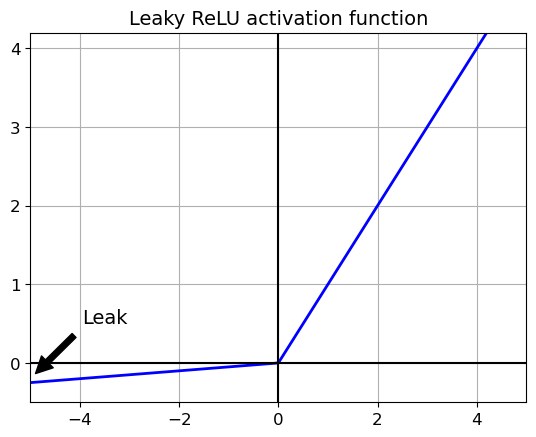

In [19]:
# plotting the Leaky ReLU activation function
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2) # calling the Leaky ReLU we created
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [20]:
# defining the model with Keras Sequential API
model_LeakyReLU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(num_input_features,)),  # flatten the input
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(3, activation="softmax")
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model_LeakyReLU.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │           2,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,103 (129.31 KB)

 Trainable params: 33,103 (129.31 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_LeakyReLU.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [23]:
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("Y_train Shape", y_train.shape)

X_train Shape (326717, 8)
X_test Shape (140022, 8)
Y_train Shape (326717, 3)


In [24]:
history_LeakyReLU = model_LeakyReLU.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7247 - loss: 1.0741 - val_accuracy: 0.8929 - val_loss: 0.2419
Epoch 2/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9011 - loss: 0.2354 - val_accuracy: 0.9229 - val_loss: 0.1674
Epoch 3/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9327 - loss: 0.1776 - val_accuracy: 0.9536 - val_loss: 0.1099
Epoch 4/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9573 - loss: 0.1242 - val_accuracy: 0.9757 - val_loss: 0.0726
Epoch 5/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9751 - loss: 0.0823 - val_accuracy: 0.9868 - val_loss: 0.0520


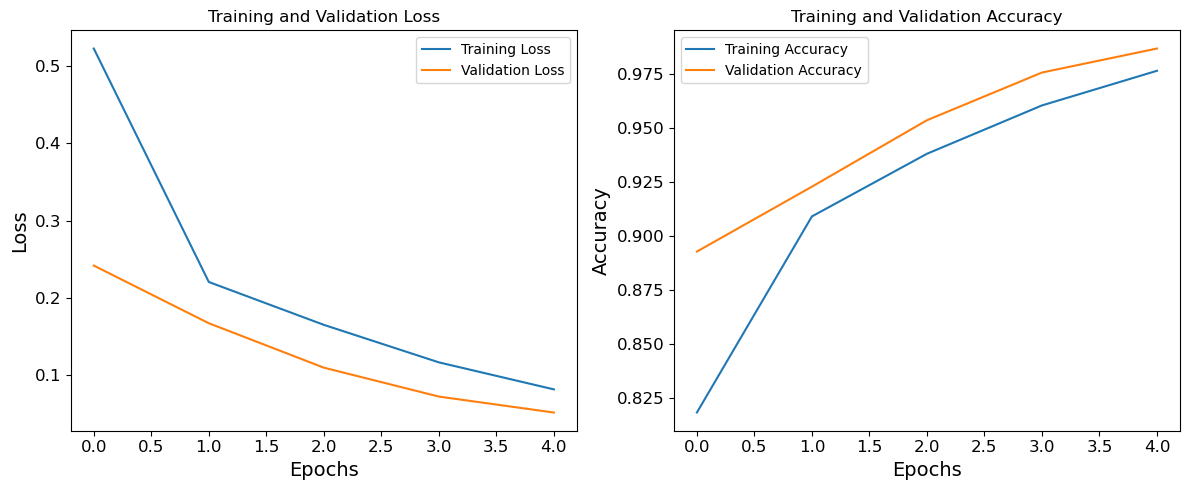

In [25]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_LeakyReLU.history['loss'], label='Training Loss')
plt.plot(history_LeakyReLU.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_LeakyReLU.history['accuracy'], label='Training Accuracy')
plt.plot(history_LeakyReLU.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Here are some observations:
1. 
Both training and validation accuracy steadily increase over epochs, which is a good sign. It suggests that the model is learning from the data and generalizing wel

 
2. .
The training loss consistently decreases over epochs, indicating that the model is improving in terms of fitting the training da

 t3. a.
The validation loss also decreases over epochs, which is a positive sign. It means the model is generalizing well to unseen d

   a4. ta.
There isn't a significant gap between training and validation accuracy or loss, which is another indication that overfitting might not be occurring.

In [26]:
# defining the model with Keras Sequential API
model_ReLU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(num_input_features,)),  # flatten the input
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.ReLU(),
    keras.layers.Dense(3, activation="softmax")
])

In [27]:
model_ReLU.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [28]:
history_ReLU = model_ReLU.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7432 - loss: 0.8474 - val_accuracy: 0.9300 - val_loss: 0.1783
Epoch 2/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9398 - loss: 0.1651 - val_accuracy: 0.9700 - val_loss: 0.0920
Epoch 3/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 10s 997us/step - accuracy: 0.9705 - loss: 0.0890 - val_accuracy: 0.9857 - val_loss: 0.0632
Epoch 4/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 10s 994us/step - accuracy: 0.9858 - loss: 0.0597 - val_accuracy: 0.9929 - val_loss: 0.0463
Epoch 5/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9919 - loss: 0.0448 - val_accuracy: 0.9949 - val_loss: 0.0281


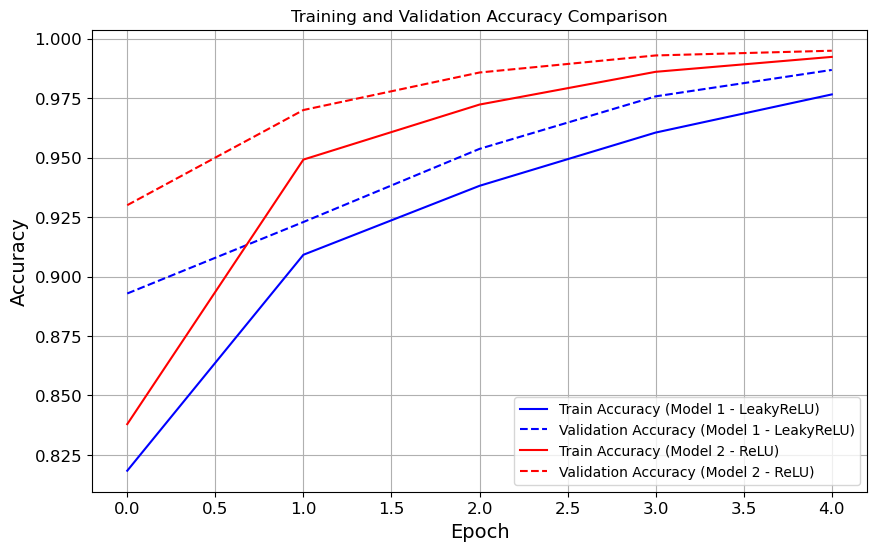

In [29]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for both models
plt.figure(figsize=(10, 6))

# Plot accuracy for model with LeakyReLU
plt.plot(history_LeakyReLU.history['accuracy'], 'b-', label='Train Accuracy (Model 1 - LeakyReLU)')
plt.plot(history_LeakyReLU.history['val_accuracy'], 'b--', label='Validation Accuracy (Model 1 - LeakyReLU)')

# Plot accuracy for model with ReLU
plt.plot(history_ReLU.history['accuracy'], 'r-', label='Train Accuracy (Model 2 - ReLU)')
plt.plot(history_ReLU.history['val_accuracy'], 'r--', label='Validation Accuracy (Model 2 - ReLU)')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()


## trying PRelU

In [30]:
# defining the model with Keras Sequential API
model_PReLU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(num_input_features,)),  # flatten the input
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(3, activation="softmax")
])

In [31]:
model_PReLU.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [32]:
history_PReLU = model_PReLU.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7627 - loss: 0.7785 - val_accuracy: 0.9386 - val_loss: 0.1700
Epoch 2/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9583 - loss: 0.1275 - val_accuracy: 0.9864 - val_loss: 0.0590
Epoch 3/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9832 - loss: 0.0747 - val_accuracy: 0.9938 - val_loss: 0.0326
Epoch 4/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9936 - loss: 0.0304 - val_accuracy: 0.9958 - val_loss: 0.0205
Epoch 5/5
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9952 - loss: 0.0207 - val_accuracy: 0.9966 - val_loss: 0.0151


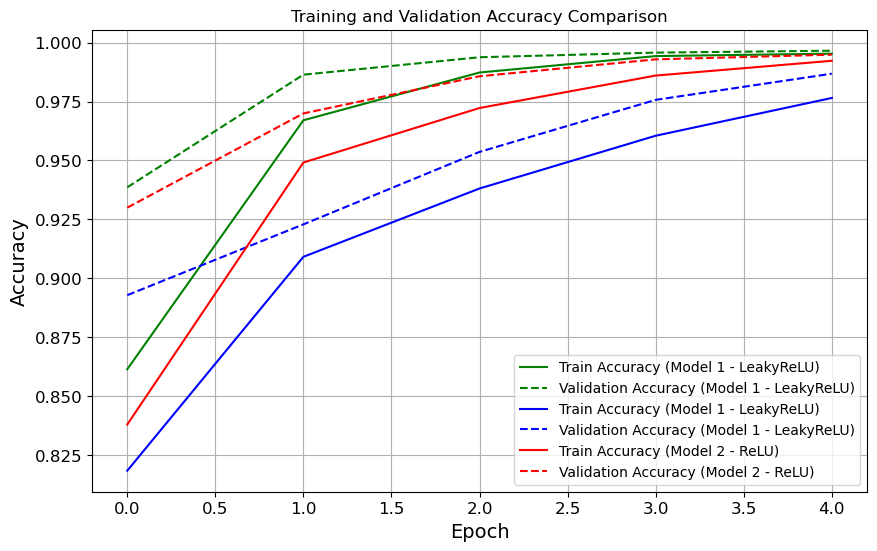

In [33]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy for both models
plt.figure(figsize=(10, 6))

plt.plot(history_PReLU.history['accuracy'], 'g-', label='Train Accuracy (Model 1 - LeakyReLU)')
plt.plot(history_PReLU.history['val_accuracy'], 'g--', label='Validation Accuracy (Model 1 - LeakyReLU)')

# Plot accuracy for model with LeakyReLU
plt.plot(history_LeakyReLU.history['accuracy'], 'b-', label='Train Accuracy (Model 1 - LeakyReLU)')
plt.plot(history_LeakyReLU.history['val_accuracy'], 'b--', label='Validation Accuracy (Model 1 - LeakyReLU)')

# Plot accuracy for model with ReLU
plt.plot(history_ReLU.history['accuracy'], 'r-', label='Train Accuracy (Model 2 - ReLU)')
plt.plot(history_ReLU.history['val_accuracy'], 'r--', label='Validation Accuracy (Model 2 - ReLU)')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

introducing dropout layer using selu


In [34]:
# defining the model with Keras Sequential API
model_selu_dropout = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(num_input_features,)),  # flatten the input
    keras.layers.Dense(300, kernel_initializer="he_normal", activation="selu"),
    keras.layers.Dropout(0.2),  
    keras.layers.Dense(200, kernel_initializer="he_normal", activation="selu"),
    keras.layers.Dropout(0.2),  
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="selu"),
    keras.layers.Dropout(0.2),  
    keras.layers.Dense(3, activation="softmax")
])

In [35]:
model_selu_dropout.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [36]:
history_selu_dropout = model_selu_dropout.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.4430 - loss: 1.6653 - val_accuracy: 0.5238 - val_loss: 0.9484
Epoch 2/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.5284 - loss: 0.9635 - val_accuracy: 0.6668 - val_loss: 0.7136
Epoch 3/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.6059 - loss: 0.8261 - val_accuracy: 0.7633 - val_loss: 0.5629
Epoch 4/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.6610 - loss: 0.7197 - val_accuracy: 0.7918 - val_loss: 0.4782
Epoch 5/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.6981 - loss: 0.6417 - val_accuracy: 0.8076 - val_loss: 0.4063
Epoch 6/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7304 - loss: 0.5747 - val_accuracy: 0.8090 - val_loss: 0.3529
Epoch 7/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7618 - loss: 0.5131 - val_accuracy: 0.8690 - val_loss: 0.2848
Epoch 8/10
10210/10210 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 

In [37]:
model_selu_dropout.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 300)                 │           2,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,305 (325.41 KB)

 Trainable params: 83,303 (325.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

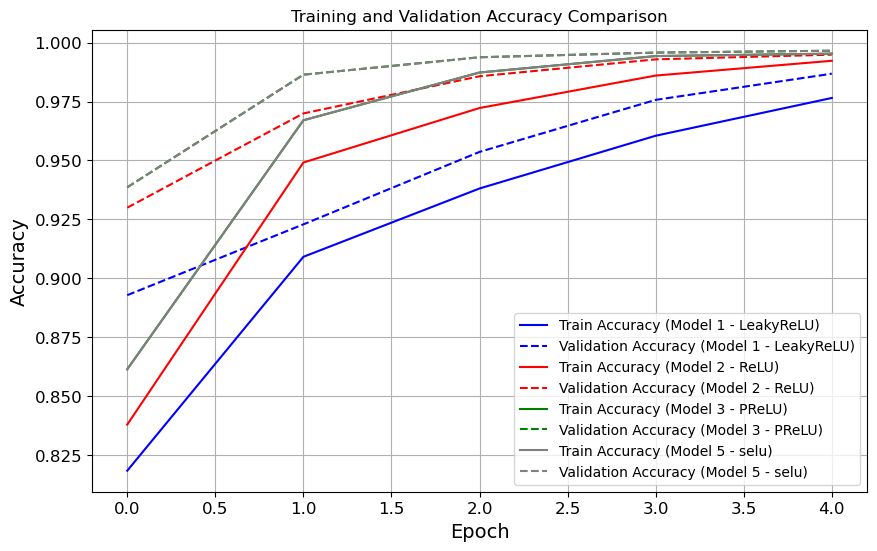

In [38]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))

# Plotting training accuracy for model 1 (LeakyReLU)
plt.plot(history_LeakyReLU.history['accuracy'], label='Train Accuracy (Model 1 - LeakyReLU)', color='blue', linestyle='-')
# Plotting validation accuracy for model 1 (LeakyReLU)
plt.plot(history_LeakyReLU.history['val_accuracy'], label='Validation Accuracy (Model 1 - LeakyReLU)', color='blue', linestyle='--')

# Plotting training accuracy for model 2 (ReLU)
plt.plot(history_ReLU.history['accuracy'], label='Train Accuracy (Model 2 - ReLU)', color='red', linestyle='-')
# Plotting validation accuracy for model 2 (ReLU)
plt.plot(history_ReLU.history['val_accuracy'], label='Validation Accuracy (Model 2 - ReLU)', color='red', linestyle='--')

# Plotting training accuracy for model 3 (PReLU)
plt.plot(history_PReLU.history['accuracy'], label='Train Accuracy (Model 3 - PReLU)', color='green', linestyle='-')
# Plotting validation accuracy for model 3 (PReLU)
plt.plot(history_PReLU.history['val_accuracy'], label='Validation Accuracy (Model 3 - PReLU)', color='green', linestyle='--')


# Plotting training accuracy for model 5 (selu)
plt.plot(history_PReLU.history['accuracy'], label='Train Accuracy (Model 5 - selu)', color='grey', linestyle='-')
# Plotting validation accuracy for model 3 (selu)
plt.plot(history_PReLU.history['val_accuracy'], label='Validation Accuracy (Model 5 - selu)', color='grey', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

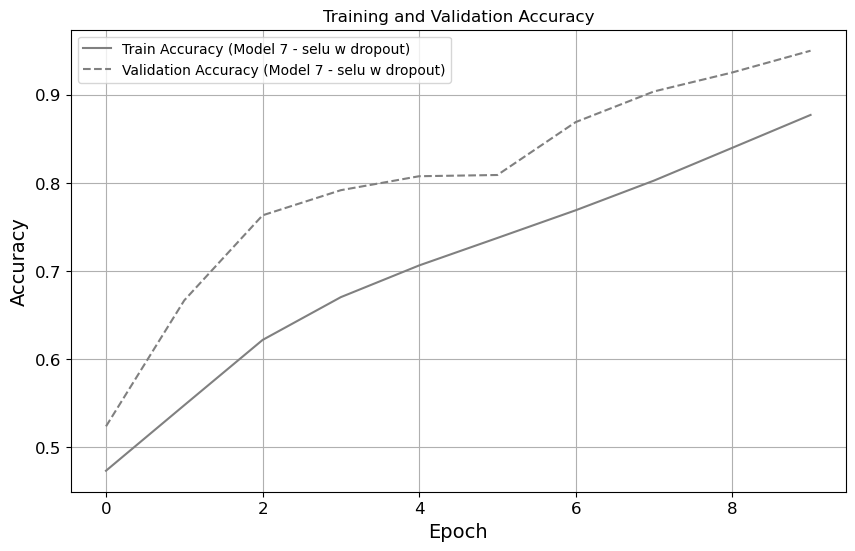

In [39]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))


plt.plot(history_selu_dropout.history['accuracy'], label='Train Accuracy (Model 7 - selu w dropout)', color='grey', linestyle='-')
plt.plot(history_selu_dropout.history['val_accuracy'], label='Validation Accuracy (Model 7 - selu w dropout)', color='grey', linestyle='--')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
from sklearn.metrics import classification_report
y_pred = np.argmax(model_selu_dropout.predict(X_test), axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred))


4376/4376 ━━━━━━━━━━━━━━━━━━━━ 3s 778us/step
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     62696
           1       1.00      0.91      0.95     37760
           2       0.99      0.91      0.95     39566

    accuracy                           0.95    140022
   macro avg       0.96      0.94      0.95    140022
weighted avg       0.95      0.95      0.95    140022



4376/4376 ━━━━━━━━━━━━━━━━━━━━ 3s 767us/step


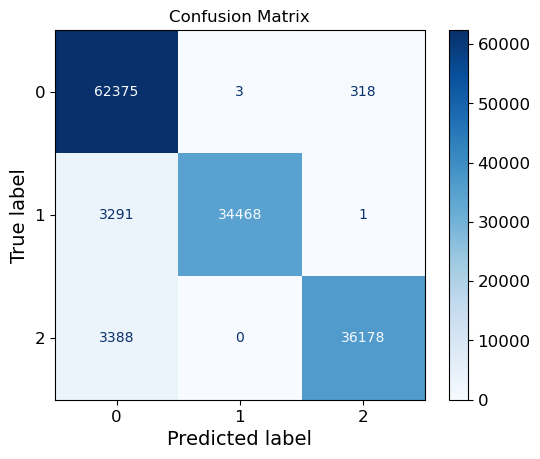

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert one-hot encoded y_test to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Assuming y_pred is already calculated as shown in your reference
y_pred_labels = np.argmax(model_selu_dropout.predict(X_test), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
